# Iris Classification using Keras

### Load the packages

In [1]:
import numpy as np
import pandas as pd
from ml_pipeline.data_input import inputData
from ml_pipeline.data_processing import processData
from ml_pipeline.data_processing import dummifyData
from ml_pipeline.data_processing import getObjectTypeColumns
from ml_pipeline.data_processing import divideDataInXY
from ml_pipeline.data_processing import normalizeData
from ml_pipeline.data_processing import denormalizeData
from ml_pipeline.data_processing import generateTrainAndTestXY
from ml_pipeline.data_processing import getUniqueValuesDictionary
from ml_pipeline.data_processing import saveUniqueValuesDictionary
from ml_pipeline.data_processing import loadUniqueValuesDictionary
from ml_pipeline.data_processing import loadScalerObject
from ml_pipeline.model import saveModel
from ml_pipeline.model import loadModel
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
import json

Using TensorFlow backend.


### Reproducibility of the model

In [2]:
np.random.seed(4)
tf.set_random_seed(2)

### Get data

In [3]:
df = inputData("csv")
df

,petal_length,petal_width,sepal_length,sepal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Select the columns to work with and shuffle the data

In [4]:
df2 = processData(df, columnsNamesToWorkWith = ['petal_length','petal_width','sepal_length','sepal_width','label'], shuffleData = True, substituteEmptyFields = False)
df2

,petal_length,petal_width,sepal_length,sepal_width,label
128,6.4,2.8,5.6,2.1,Iris-virginica
18,5.7,3.8,1.7,0.3,Iris-setosa
130,7.4,2.8,6.1,1.9,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor
14,5.8,4.0,1.2,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
133,6.3,2.8,5.1,1.5,Iris-virginica


### Get the object type columns for one hot encoding

In [5]:
colslist = getObjectTypeColumns(df2)
colslist

['label']

### Get the categories in the label column

In [6]:
uvDict = getUniqueValuesDictionary(df2, colslist)
uvDict

{'label': ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']}

### Save the unique values dictionary object

In [7]:
saveUniqueValuesDictionary(uvDict, "./savedmodelfolder/uvDict.joblib")

### Load the unique values dictionary object

In [8]:
uvDict = loadUniqueValuesDictionary("./savedmodelfolder/uvDict.joblib")
uvDict

{'label': ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']}

### Dummify or one hot encode the data using the unique values dictionary object

In [9]:
df3 = dummifyData(df2, uvDict)
df3

,petal_length,petal_width,sepal_length,sepal_width,label_Iris-virginica,label_Iris-setosa,label_Iris-versicolor
128,6.4,2.8,5.6,2.1,1.0,0.0,0.0
18,5.7,3.8,1.7,0.3,0.0,1.0,0.0
130,7.4,2.8,6.1,1.9,1.0,0.0,0.0
105,7.6,3.0,6.6,2.1,1.0,0.0,0.0
107,7.3,2.9,6.3,1.8,1.0,0.0,0.0
78,6.0,2.9,4.5,1.5,0.0,0.0,1.0
83,6.0,2.7,5.1,1.6,0.0,0.0,1.0
14,5.8,4.0,1.2,0.2,0.0,1.0,0.0
5,5.4,3.9,1.7,0.4,0.0,1.0,0.0
133,6.3,2.8,5.1,1.5,1.0,0.0,0.0


### Get the one hot encoded column names for the label

In [10]:
listcolYNames = ['label_' + x for x in uvDict['label']]
listcolYNames

['label_Iris-virginica', 'label_Iris-setosa', 'label_Iris-versicolor']

### Divide the data in X and Y datasets

In [11]:
Xdata, Ydata = divideDataInXY(df3, listcolYNames)

In [12]:
Xdata

array([[6.4, 2.8, 5.6, 2.1],
       [5.7, 3.8, 1.7, 0.3],
       [7.4, 2.8, 6.1, 1.9],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.3, 2.8, 5.1, 1.5],
       [5. , 3. , 1.6, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.1, 2.9, 4.7, 1.4],
       [5.7, 2.5, 5. , 2. ],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 2. , 3.5, 1. ],
       [4.7, 3.2, 1.3, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5. , 3.2, 1.2, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [6.2, 2.2, 4.5, 1.5],
       [5. , 3.4, 1.6, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.4, 1.7, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.4, 3. , 4.5, 1.5],
       [4.6, 3.2, 1.4, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [5. , 2

In [13]:
Ydata

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

### Normalize the X dataset and save the scaler object

In [14]:
Xdata = normalizeData(Xdata, fit_transform = True, scalerfilepath = "./savedmodelfolder/ModelScalerObject.joblib")
Xdata

array([[0.5833334 , 0.3333333 , 0.779661  , 0.83333325],
       [0.38888884, 0.74999994, 0.11864409, 0.08333333],
       [0.86111104, 0.3333333 , 0.8644068 , 0.74999994],
       [0.9166666 , 0.4166667 , 0.9491526 , 0.83333325],
       [0.8333334 , 0.37500006, 0.8983052 , 0.70833325],
       [0.4722222 , 0.37500006, 0.59322035, 0.5833333 ],
       [0.4722222 , 0.2916667 , 0.69491524, 0.625     ],
       [0.41666675, 0.8333333 , 0.03389831, 0.04166667],
       [0.30555558, 0.7916667 , 0.11864409, 0.125     ],
       [0.5555556 , 0.3333333 , 0.69491524, 0.5833333 ],
       [0.19444442, 0.4166667 , 0.10169491, 0.04166667],
       [0.13888896, 0.5833333 , 0.10169491, 0.04166667],
       [0.13888896, 0.4166667 , 0.0677966 , 0.        ],
       [0.5       , 0.37500006, 0.62711865, 0.5416666 ],
       [0.38888884, 0.20833331, 0.6779661 , 0.7916666 ],
       [0.16666663, 0.4583333 , 0.08474576, 0.        ],
       [0.19444442, 0.        , 0.42372882, 0.375     ],
       [0.11111104, 0.50000006,

### Divide the datasets in train and test datasets

In [15]:
trainX, trainY, testX, testY = generateTrainAndTestXY(Xdata, Ydata, splitfraction = 0.9)

In [16]:
trainX.shape

(135, 4)

In [17]:
trainY.shape

(135, 3)

In [18]:
testX.shape

(15, 4)

In [19]:
testY.shape

(15, 3)

### Create the Keras model

In [20]:
class PrintLog(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0:
            print(epoch, logs)
        print('', end='')

In [21]:
def MyKerasModel(num_input = 1, num_h1 = 1, num_h2 = 1, num_output = 3):
    
    init = keras.initializers.glorot_uniform(seed=1)
    simple_adam = keras.optimizers.Adam()
    
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=num_h1, input_dim=num_input, kernel_initializer=init, activation='relu'))
    model.add(keras.layers.Dense(units=num_h2))
    model.add(keras.layers.Dense(units=num_output, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=simple_adam, metrics=['accuracy'])
    
    return model

### Train the model

In [22]:
model = MyKerasModel(num_input = 4, num_h1 = 5, num_h2 = 6, num_output = 3)

history = model.fit(trainX, trainY, epochs = 1000, batch_size = 10, validation_split= 0.1, verbose = 0, callbacks=[PrintLog()]) # early_stop, 

0 {'val_loss': 1.2129527160099574, 'val_acc': 0.42857142857142855, 'loss': 1.2100240701486256, 'acc': 0.34710744257308235}
50 {'val_loss': 0.3310716279915401, 'val_acc': 0.9285714285714286, 'loss': 0.4071692110170141, 'acc': 0.8595041233645982}
100 {'val_loss': 0.18877463681357248, 'val_acc': 1.0, 'loss': 0.2445953746301253, 'acc': 0.9090908972685002}
150 {'val_loss': 0.11820463729756218, 'val_acc': 1.0, 'loss': 0.1765118271174017, 'acc': 0.9173553620488191}
200 {'val_loss': 0.08760576003364154, 'val_acc': 1.0, 'loss': 0.14652974155446716, 'acc': 0.9421487514637719}
250 {'val_loss': 0.06737129177365984, 'val_acc': 1.0, 'loss': 0.12668664150001588, 'acc': 0.9421487514637719}
300 {'val_loss': 0.054693401125924926, 'val_acc': 1.0, 'loss': 0.11460322906717288, 'acc': 0.9504132162440907}
350 {'val_loss': 0.047508757561445236, 'val_acc': 1.0, 'loss': 0.10586764497205245, 'acc': 0.950413211318087}
400 {'val_loss': 0.041340851091912816, 'val_acc': 1.0, 'loss': 0.10165185709137609, 'acc': 0.950

### Plot metrics

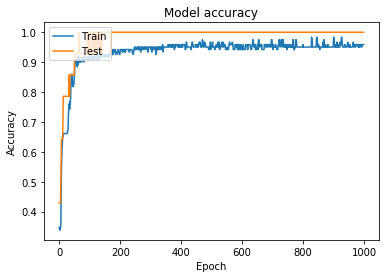

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

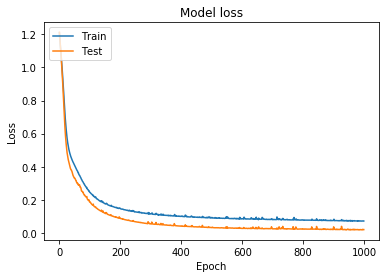

In [24]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

### Evaluate the model

In [25]:
eval1 = model.evaluate(testX, testY, verbose=0)
eval1

[0.06945589184761047, 0.9333333373069763]

### Save the model

In [26]:
saveModel(model)

### Load the model

In [27]:
model = loadModel()

### Predict data

In [28]:
preds = model.predict(testX)
preds

array([[1.57862374e-17, 1.00000000e+00, 3.46160149e-08],
       [1.81213145e-18, 1.00000000e+00, 1.27456499e-08],
       [9.90549982e-01, 1.83028686e-08, 9.45009477e-03],
       [4.73627078e-05, 4.26047991e-05, 9.99909997e-01],
       [3.66852432e-03, 1.43406924e-05, 9.96317148e-01],
       [3.58636701e-03, 1.56373499e-05, 9.96397972e-01],
       [9.99967217e-01, 1.37054985e-11, 3.27769521e-05],
       [9.55628276e-01, 1.22197847e-07, 4.43716869e-02],
       [2.14330107e-03, 1.68025836e-05, 9.97839928e-01],
       [8.60325694e-01, 4.11905461e-07, 1.39673904e-01],
       [2.11731438e-03, 1.35800992e-05, 9.97869134e-01],
       [3.45223136e-02, 1.59695501e-05, 9.65461671e-01],
       [9.99831200e-01, 1.50714746e-10, 1.68737824e-04],
       [4.54210490e-01, 2.93278390e-06, 5.45786619e-01],
       [9.99716222e-01, 4.31313596e-10, 2.83765636e-04]], dtype=float32)

In [29]:
predictedcategory = [np.argmax(x) for x in preds]
predictedcategory

[1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0]

In [30]:
testYcategory = [np.argmax(x) for x in testY]
testYcategory

[1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0]

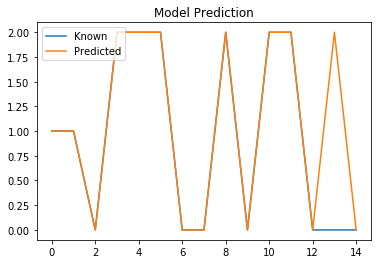

In [31]:
# Plot known and predicted values
plt.plot(testYcategory)
plt.plot(predictedcategory)
plt.title('Model Prediction')
plt.legend(['Known', 'Predicted'], loc='upper left')
plt.show()